In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
import seaborn as sns

/home/maciek/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
%matplotlib inline

In [5]:
# raport = pd.concat(
#     (pd.read_csv('dude_horizontal_dock_final.csv', index_col=0),
#     pd.read_csv('dude_horizontal_dude_final.csv', index_col=0),
#     pd.read_csv('dude_horizontal_vina_final.csv', index_col=0))).reset_index(drop=True)

In [6]:
raport_per_target = pd.read_csv('dude_per_target_final.csv', index_col=0)
raport_per_target.drop('head', axis=1, inplace=True)
raport_per_target['n_folds'] = 5
raport_per_target['kind'] = 'Per Target'

raport_per_target['engine'].replace('dock', 'Dock 6.6', inplace=True)
raport_per_target['engine'].replace('dude', 'Dock 3.6', inplace=True)
raport_per_target['engine'].replace('vina', 'Autodock Vina', inplace=True)

raport_per_target['v'] = 'RF_v' + raport_per_target['v'].astype(str)
raport_per_target.rename(columns={'v':'score'}, inplace=True)

raport_per_target = raport_per_target.groupby(('engine', 'kind', 'score', 'n_folds', 'dude_id')).mean().reset_index()

In [7]:
raport_per_target.groupby(('engine', 'kind', 'score', 'n_folds')).mean().to_excel('dude_raport_per_target.xls')

In [8]:
raport_classic = pd.read_csv('dude_classical_final_nfolds.csv', index_col=0)
raport_classic.rename(columns={'auc':'roc_auc', 'log_auc': 'roc_log_auc'}, inplace=True)
# add missing colums
raport_classic['n_folds'] = 0
raport_classic['accuracy'] = None
raport_classic['precision'] = None
raport_classic['recall'] = None

raport_classic['kind'] = 'Horizontal'#'Classical'

In [9]:
raport_classic.columns

Index([u'engine', u'score', u'ef0.1', u'ef1', u'ef10', u'ef1_perc', u'ef2',
       u'ef5', u'mse', u'rk', u'rk_active', u'rk_inactive', u'roc_auc',
       u'roc_log_auc', u'rp', u'rp_active', u'rp_inactive', u'rs',
       u'rs_active', u'rs_inactive', u'n_folds', u'accuracy', u'precision',
       u'recall', u'kind'],
      dtype='object')

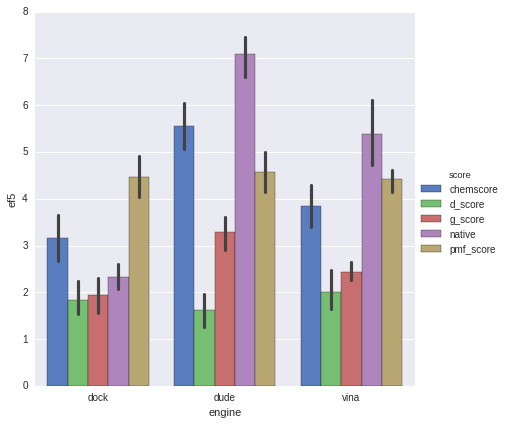

In [10]:
g = sns.factorplot(x="engine", y="ef5", hue="score", data=raport_classic, size=6, kind="bar", palette="muted")

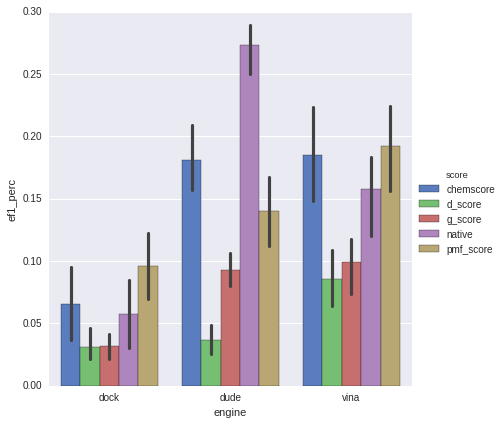

In [11]:
g = sns.factorplot(x="engine", y="ef1_perc", hue="score", data=raport_classic, size=6, kind="bar", palette="muted")

In [12]:
raport_horizontal = pd.read_csv('dude_horizontal_final_multitarget.csv', index_col=0)
raport_horizontal.drop('head',axis=1, inplace=True)

# rename 'v' to 'scores'
raport_horizontal['v'] = 'RF_v' + raport_horizontal['v'].astype(int).astype(str)
raport_horizontal.rename(columns={'v':'score'}, inplace=True)
raport_horizontal['n_folds'] = 5

raport_horizontal['kind'] = 'Horizontal'

In [13]:
raport_vertical = pd.read_csv('dude_vertical_final.csv', index_col=0)
raport_vertical.drop('head',axis=1, inplace=True)

#raport_vertical = raport_vertical[raport_vertical.n_folds == 20]

# rename 'v' to 'scores'
raport_vertical['v'] = 'RF_v' + raport_vertical['v'].astype(int).astype(str)
raport_vertical.rename(columns={'v':'score'}, inplace=True)

raport_vertical['rk_inactive'] = 0
raport_vertical['rp_inactive'] = 0
raport_vertical['rs_inactive'] = 0

raport_vertical['kind'] = 'Vertical'

In [14]:
raport_vertical_loo = pd.read_csv('dude_vertical_loo_final.csv', index_col=0).dropna()
#raport_vertical_loo.drop('head',axis=1, inplace=True)

# rename 'v' to 'scores'
raport_vertical_loo['v'] = 'RF_v' + raport_vertical_loo['v'].astype(int).astype(str)
raport_vertical_loo.rename(columns={'v':'score'}, inplace=True)

raport_vertical_loo['kind'] = 'Vertical LOO'

In [15]:
raport_vertical_loo_seed_10 = pd.read_csv('dude_vertical_loo_seed_final_10proc.csv', index_col=0).dropna()
#raport_vertical_loo_seed_10.drop('head',axis=1, inplace=True)

# rename 'v' to 'scores'
raport_vertical_loo_seed_10['v'] = 'RF_v' + raport_vertical_loo_seed_10['v'].astype(int).astype(str)
raport_vertical_loo_seed_10.rename(columns={'v':'score'}, inplace=True)

raport_vertical_loo_seed_10['kind'] = 'Vertical LOO + seed (10% actives)'

In [16]:
raport_vertical.columns

Index([u'accuracy', u'ef0.1', u'ef1', u'ef10', u'ef1_perc', u'ef2', u'ef5',
       u'engine', u'mse', u'precision', u'recall', u'rk', u'rk_active',
       u'rk_inactive', u'roc_auc', u'roc_log_auc', u'rp', u'rp_active',
       u'rp_inactive', u'rs', u'rs_active', u'rs_inactive', u'score',
       u'n_folds', u'kind'],
      dtype='object')

In [17]:
cols = raport_vertical.columns
#cols = ['engine', 'kind', 'score', 'ef1', 'roc_auc']
raport = pd.concat((raport_classic[cols],
                    raport_vertical[cols],
#                     raport_vertical_loo[cols],
#                     raport_vertical_loo_seed_10[cols],
                    raport_horizontal[cols],
                    raport_per_target[cols],
                   ))#

In [18]:
#drop v5
raport = raport[raport.score != 'RF_v5']

In [19]:
raport_final = raport.copy()
# adjust names
raport_final['engine'].replace('dock', 'Dock 6.6', inplace=True)
raport_final['engine'].replace('dude', 'Dock 3.6', inplace=True)
raport_final['engine'].replace('vina', 'Autodock Vina', inplace=True)

raport_final['score'].replace('chemscore', 'Chemscore', inplace=True)
raport_final['score'].replace('d_score', 'D score', inplace=True)
raport_final['score'].replace('g_score', 'G score', inplace=True)
raport_final['score'].replace('pmf_score', 'PMF score', inplace=True)

raport_final['score'].replace('native', 'Native', inplace=True)
#raport_final.loc[raport_final['score'] == 'native', 'score'] = raport_final[raport_final['score'] == 'native']['engine']


In [20]:
raport.columns

Index([u'accuracy', u'ef0.1', u'ef1', u'ef10', u'ef1_perc', u'ef2', u'ef5',
       u'engine', u'mse', u'precision', u'recall', u'rk', u'rk_active',
       u'rk_inactive', u'roc_auc', u'roc_log_auc', u'rp', u'rp_active',
       u'rp_inactive', u'rs', u'rs_active', u'rs_inactive', u'score',
       u'n_folds', u'kind'],
      dtype='object')

In [21]:
table = raport_final.groupby(('engine', 'kind', 'score')).mean()
table = table[[
               'ef0.1', 'ef1','ef2','ef5','ef10',
               'roc_auc','roc_log_auc',
               'rp','rs','rk',
               'rp_active','rs_active','rk_active',
               'rp_inactive','rs_inactive','rk_inactive',
              ]].round(2)
table.index.rename('Docking Software', level=0, inplace=True)
table.index.rename('Cross Validation', level=1, inplace=True)
table.index.rename('Re-Scoring', level=2, inplace=True)
table.to_excel('dude_raport_all.xls')
table

ef0.1    ef1    ef2    ef5  \
Docking Software Cross Validation Re-Scoring                               
Autodock Vina    Horizontal       Chemscore    8.50   6.24   5.08   3.84   
                                  D score      4.46   3.28   2.59   2.01   
                                  G score      5.98   3.58   3.04   2.44   
                                  Native      20.55  10.98   8.20   5.38   
                                  PMF score   11.70   7.78   6.20   4.41   
                                  RF_v1       43.65  26.11  18.15  10.12   
                                  RF_v2       51.06  31.76  21.85  11.89   
                                  RF_v3       49.61  31.17  21.18  11.54   
                 Per Target       RF_v1       51.10  31.73  22.46  12.39   
                                  RF_v2       54.98  36.29  25.38  13.38   
                                  RF_v3       54.00  36.10  25.22  13.41   
                 Vertical         RF_v1       16.97   7.61   6.16   4.41   
                                  RF_v2       25.00  11.39   8.67   5.85   
                                  RF_v3       29.23  13.53  10.15   6.55   
Dock 3.6         Horizontal       Chemscore   17.16  11.21   8.63   5.56   
                                  D score      1.61   2.12   2.00   1.61   
                                  G score      7.50   5.52   4.50   3.30   
                                  Native      29.39  16.86  12.04   7.09   
                                  PMF score   11.13   8.49   6.56   4.56   
                                  RF_v1       50.99  30.70  20.71  11.00   
                                  RF_v2       56.49  37.89  25.26  12.84   
                                  RF_v3       54.87  35.34  24.04  12.47   
                 Per Target       RF_v1       53.27  36.84  25.56  13.46   
                                  RF_v2       58.55  43.27  29.55  14.73   
                                  RF_v3       57.76  41.80  28.77  14.56   
                 Vertical         RF_v1       16.04   7.59   6.20   4.47   
                                  RF_v2       31.19  13.33   9.75   6.32   
                                  RF_v3       37.43  15.28  10.87   6.82   
Dock 6.6         Horizontal       Chemscore    7.25   4.94   4.21   3.16   
                                  D score      2.20   2.46   2.22   1.83   
                                  G score      4.95   2.85   2.35   1.94   
                                  Native       4.61   3.55   3.05   2.33   
                                  PMF score   13.40   8.29   6.34   4.46   
                                  RF_v1       51.75  23.73  16.28   8.92   
                                  RF_v2       65.92  28.66  18.99  10.34   
                                  RF_v3       61.91  28.50  18.67  10.10   
                 Per Target       RF_v1       66.85  32.98  21.97  11.63   
                                  RF_v2       75.37  38.33  24.62  12.68   
                                  RF_v3       71.59  35.83  23.41  12.45   
                 Vertical         RF_v1       16.23   7.77   6.04   4.28   
                                  RF_v2       24.31  10.31   7.81   5.31   
                                  RF_v3       25.04  11.42   8.61   5.68   

                                              ef10  roc_auc  roc_log_auc  \
Docking Software Cross Validation Re-Scoring                               
Autodock Vina    Horizontal       Chemscore   2.90     0.69         0.27   
                                  D score     1.63     0.55         0.19   
                                  G score     2.02     0.61         0.21   
                                  Native      3.82     0.74         0.33   
                                  PMF score   3.29     0.71         0.30   
                                  RF_v1       6.33     0.79         0.25   
                                  RF_v2       7.11     0.82         0.26   
                 

In [22]:
#raport_final.groupby(('engine', 'kind', 'score', 'n_folds')).std()

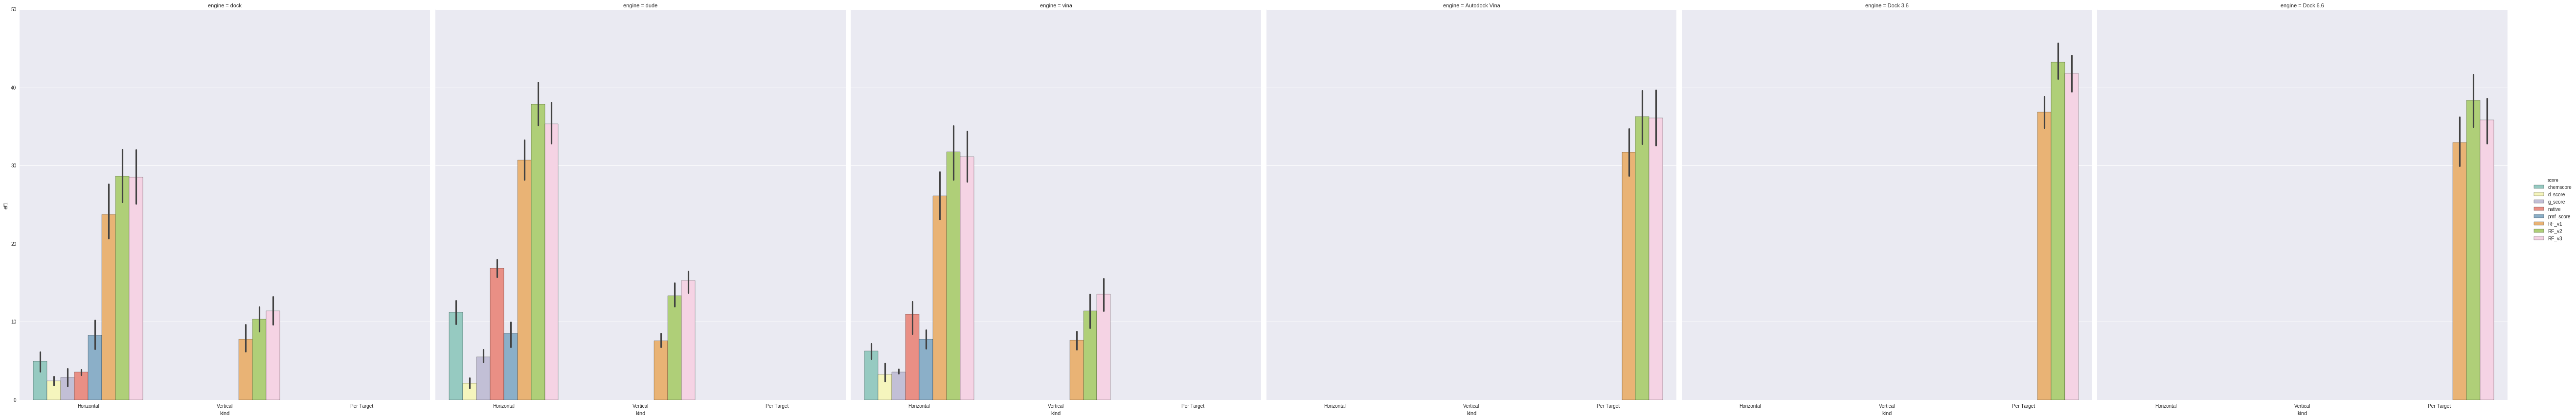

In [23]:
g = sns.factorplot(col="engine", y="ef1", x='kind', hue="score", data=raport, size=12, kind="bar", palette="Set3")

In [24]:
#g = sns.factorplot(x="engine", y="ef1", hue="score", data=raport, size=12, kind="bar", palette="Set3")

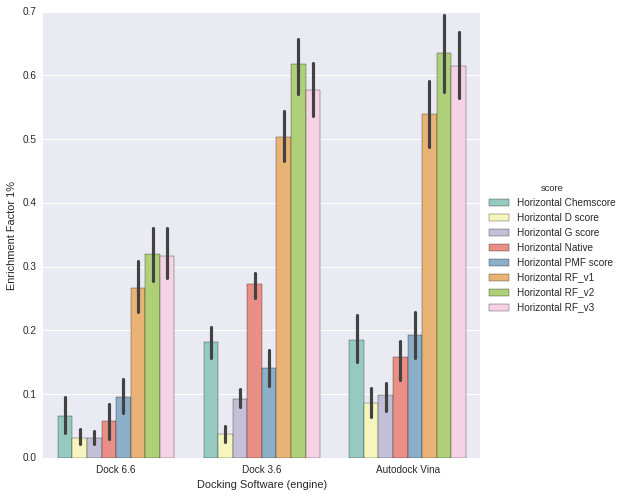

In [25]:
data2 = raport_final.copy()[raport_final.kind.str.startswith('Classical') | raport_final.kind.str.startswith('Horizontal')]
data2['score'] = data2['kind'] + ' ' + data2['score']
g = sns.factorplot(x="engine", y="ef1_perc", hue="score", data=data2, size=7, kind="bar", palette="Set3")
g.set_titles('')
g.set_ylabels('Enrichment Factor 1%')
g.set_xlabels('Docking Software (engine)')
g.savefig('dude_raport_horizontal_ef1.svg')

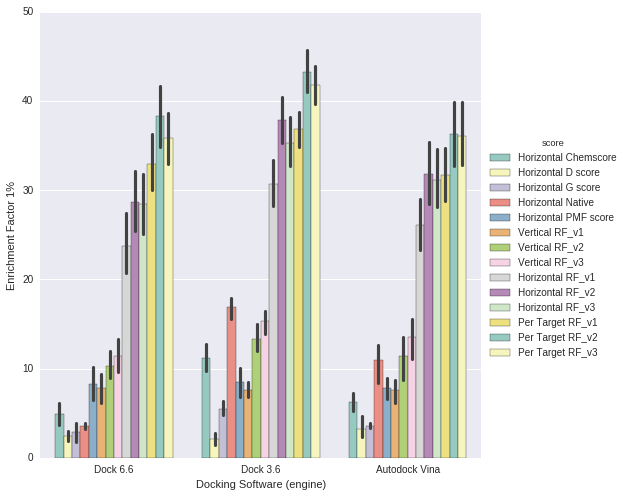

In [26]:
data2 = raport_final.copy()
data2['score'] = data2['kind'] + ' ' + data2['score']
g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=7, kind="bar", palette=sns.color_palette("Set3", 15))
g.set_titles('')
g.set_ylabels('Enrichment Factor 1%')
g.set_xlabels('Docking Software (engine)')
g.savefig('dude_raport_all_ef1.svg')

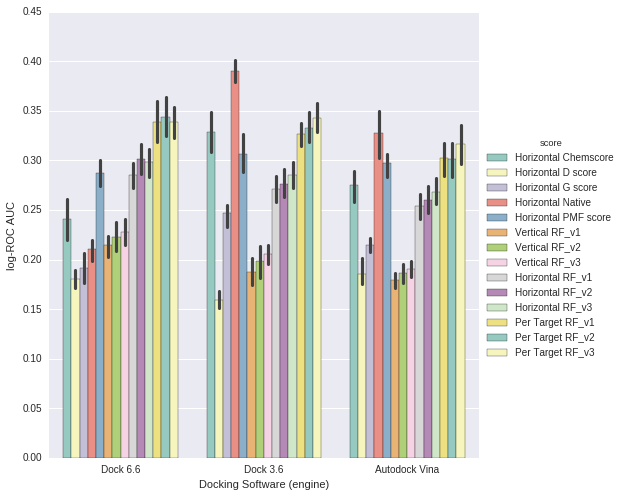

In [27]:
data2 = raport_final.copy()
data2['score'] = data2['kind'] + ' ' + data2['score']
g = sns.factorplot(x="engine", y="roc_log_auc", hue="score", data=data2, size=7, kind="bar", palette="Set3")
g.set_titles('')
g.set_ylabels('log-ROC AUC')
g.set_xlabels('Docking Software (engine)')
g.savefig('dude_raport_all_roc_log_auc.svg')

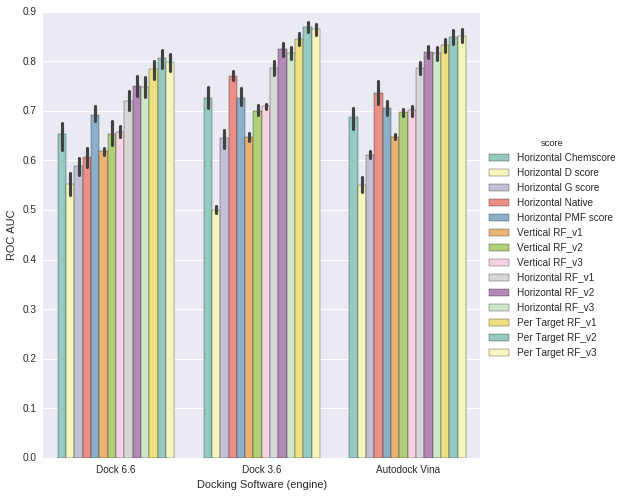

In [28]:
data2 = raport_final.copy()
data2['score'] = data2['kind'] + ' ' + data2['score']
g = sns.factorplot(x="engine", y="roc_auc", hue="score", data=data2, size=7, kind="bar", palette="Set3")
g.set_titles('')
g.set_ylabels('ROC AUC')
g.set_xlabels('Docking Software (engine)')
g.savefig('dude_raport_all_roc_auc.svg')

In [29]:
data2[data2.kind == 'Vertical']

,accuracy,ef0.1,ef1,ef10,ef1_perc,ef2,ef5,engine,mse,precision,...,roc_log_auc,rp,rp_active,rp_inactive,rs,rs_active,rs_inactive,score,n_folds,kind
0,0.842983,22.778608,9.038202,3.486735,0.144710,7.013350,4.786295,Dock 3.6,0.071097,0.045369,...,0.197348,0.144049,0.047154,0.0,0.094102,0.007613,0.0,Vertical RF_v1,5,Vertical
1,0.768345,12.184598,6.353398,3.389563,0.108631,5.309794,4.247709,Dock 3.6,0.061271,0.0400955,...,0.165643,0.125854,0.109282,0.0,0.101092,0.151655,0.0,Vertical RF_v1,5,Vertical
2,0.807789,22.467610,8.466837,3.131219,0.122334,6.137663,4.205881,Dock 3.6,0.067617,0.0345132,...,0.176681,0.123444,0.055799,0.0,0.080725,0.100521,0.0,Vertical RF_v1,5,Vertical
3,0.825112,8.070605,7.040200,3.339524,0.116310,6.204008,4.439912,Dock 3.6,0.073321,0.0435922,...,0.187772,0.125186,0.099862,0.0,0.093835,0.103501,0.0,Vertical RF_v1,5,Vertical
4,0.858557,14.695274,7.048537,3.598345,0.112125,6.351879,4.655717,Dock 3.6,0.054411,0.0495899,...,0.208230,0.118441,0.010700,0.0,0.101271,0.055735,0.0,Vertical RF_v1,5,Vertical
5,0.830989,21.646891,9.078013,3.407408,0.146958,7.147489,4.802671,Autodock Vina,0.069827,0.0441808,...,0.191461,0.148290,0.070272,0.0,0.097745,0.033157,0.0,Vertical RF_v1,5,Vertical
6,0.805056,13.686941,7.189776,3.474411,0.169063,6.213362,4.643699,Autodock Vina,0.076082,0.0600118,...,0.181391,0.154878,0.087774,0.0,0.114933,0.109545,0.0,Vertical RF_v1,5,Vertical
7,0.780569,25.514491,9.236338,3.311226,0.110563,6.700469,4.436741,Autodock Vina,0.054675,0.0270526,...,0.165917,0.127200,0.122582,0.0,0.072942,0.118705,0.0,Vertical RF_v1,5,Vertical
8,0.801104,12.412888,7.211533,3.471256,0.132571,5.820476,4.423288,Autodock Vina,0.082986,0.0460747,...,0.178287,0.146280,0.177491,0.0,0.100926,0.165747,0.0,Vertical RF_v1,5,Vertical
9,0.808791,11.565221,5.318449,3.033981,0.084712,4.902945,3.723900,Autodock Vina,0.054746,0.0394824,...,0.179322,0.086364,-0.005746,0.0,0.091318,0.089459,0.0,Vertical RF_v1,5,Vertical


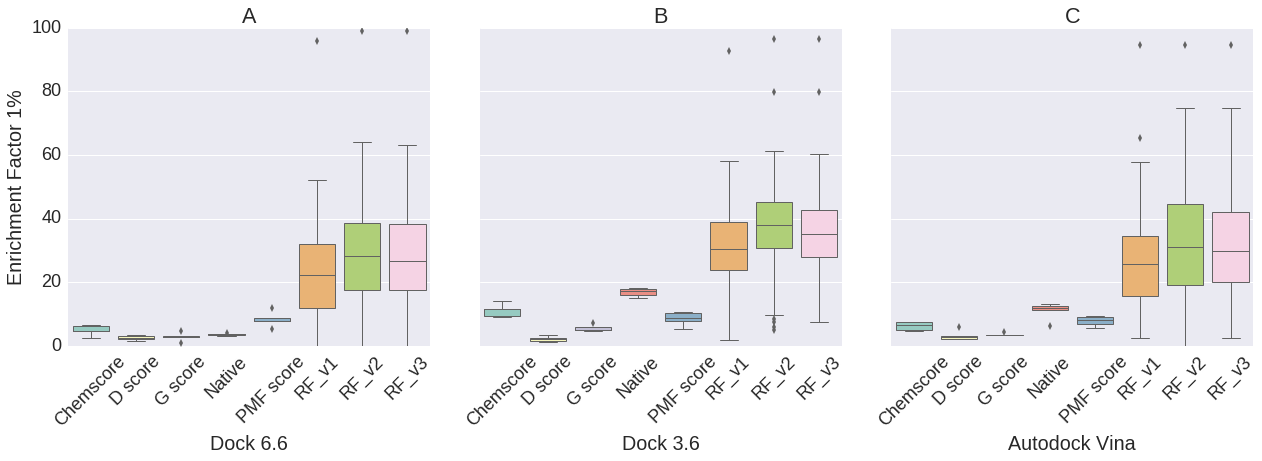

In [30]:
data2 = raport_final.copy()
data2 = data2[(data2.kind.str.startswith('Horizontal'))]
#data2['score'] = data2['kind'] + ' ' + data2['score']
#data2.loc[data2['engine'] == 'Dock 6.6'] = '\nA'

sns.set(font_scale=1.8)

#g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=12, kind="box", palette="Set3",)
g = sns.FacetGrid(col="engine", data=data2, size=6, sharey=True, sharex=False)
g.map(sns.boxplot, "score", "ef1", palette="Set3", linewidth=1.)

g.set_ylabels('Enrichment Factor 1%')
g.set_xlabels('{col_name}')

g.set_titles('{col_name}')
for ax, i in zip(g.axes[0],['A','B','C']):
    ax.set_xlabel(ax.title.get_text())
    ax.set_title(i)

g.set_xticklabels(rotation=45)
g.savefig('dude_raport_boxplots_horizontal.svg')
g.savefig('dude_raport_boxplots_horizontal.png', dpi=300)

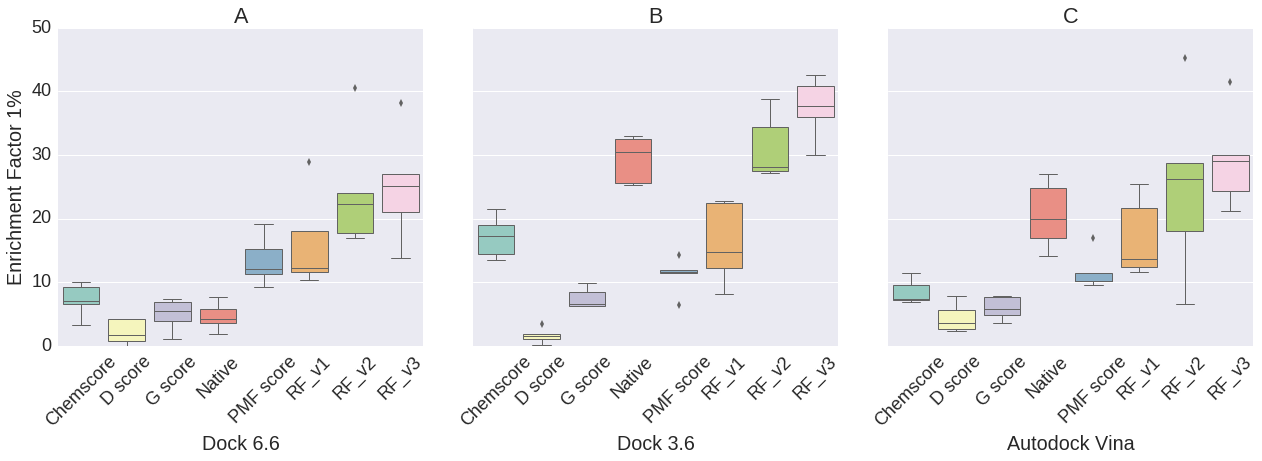

In [31]:
data2 = raport_final.copy()
#data2 = data2[(data2.engine == 'Dock 3.6') & (data2.kind.str.startswith('Vertical'))]
#data2['score'] = data2['kind'] + ' ' + data2['score']
data2 = data2[data2.kind.str.startswith('Vertical') | data2.kind.str.startswith('Horizontal') & ~data2.score.str.startswith('RF')]

sns.set(font_scale=1.8)

#g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=7, kind="box", palette="Set3",)
g = sns.FacetGrid(col="engine", data=data2, size=6, sharey=True, sharex=False, )
g.map(sns.boxplot, "score", "ef0.1", palette="Set3", linewidth=1.)

g.set_ylabels('Enrichment Factor 1%')
g.set_xlabels('{col_name}')

g.set_titles('{col_name}')
for ax, i in zip(g.axes[0],['A','B','C']):
    ax.set_xlabel(ax.title.get_text())
    ax.set_title(i)


g.set_xticklabels(rotation=45)
# g.fig.tight_layout()
g.savefig('dude_raport_boxplots_vertical.svg')
g.savefig('dude_raport_boxplots_vertical.png', dpi=300)

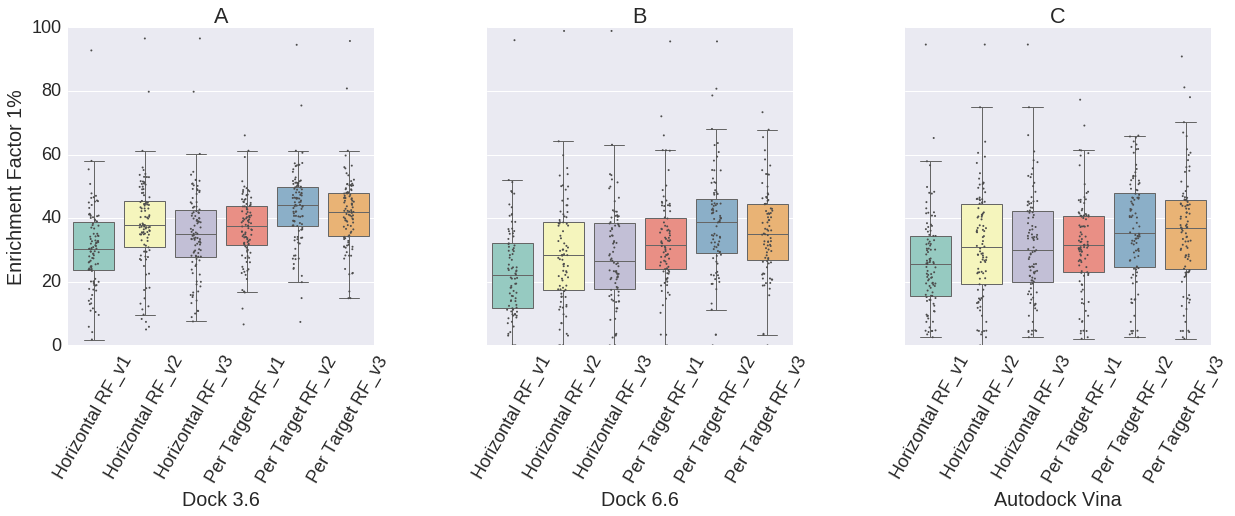

In [32]:
data2 = raport_final.copy()
data2['score'] = data2['kind'] + ' ' + data2['score']

data2 = data2[data2.kind.str.startswith('Per Target') | data2.kind.str.startswith('Horizontal') & data2.score.str.startswith('Horizontal RF')]


sns.set(font_scale=1.8)

#g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=7, kind="box", palette="Set3",)
g = sns.FacetGrid(col="engine", data=data2, size=6, sharey=True, sharex=False, ylim=(0,100), aspect=1)
g.map(sns.boxplot, "score", "ef1", palette="Set3", fliersize=0, linewidth=1.)
g.map(sns.stripplot, "score", "ef1", data=data2, jitter=True, size=2, color=".3", linewidth=0)

g.set_ylabels('Enrichment Factor 1%')
g.set_xlabels('Docking Software')

g.set_titles('{col_name}')
for ax, i in zip(g.axes[0],['A','B','C']):
    ax.set_xlabel(ax.title.get_text())
    ax.set_title(i)

g.set_xticklabels(rotation=60)

g.savefig('dude_raport_boxplots_all_wpoints.svg')
g.savefig('dude_raport_boxplots_all_wpoints.png', dpi=300)

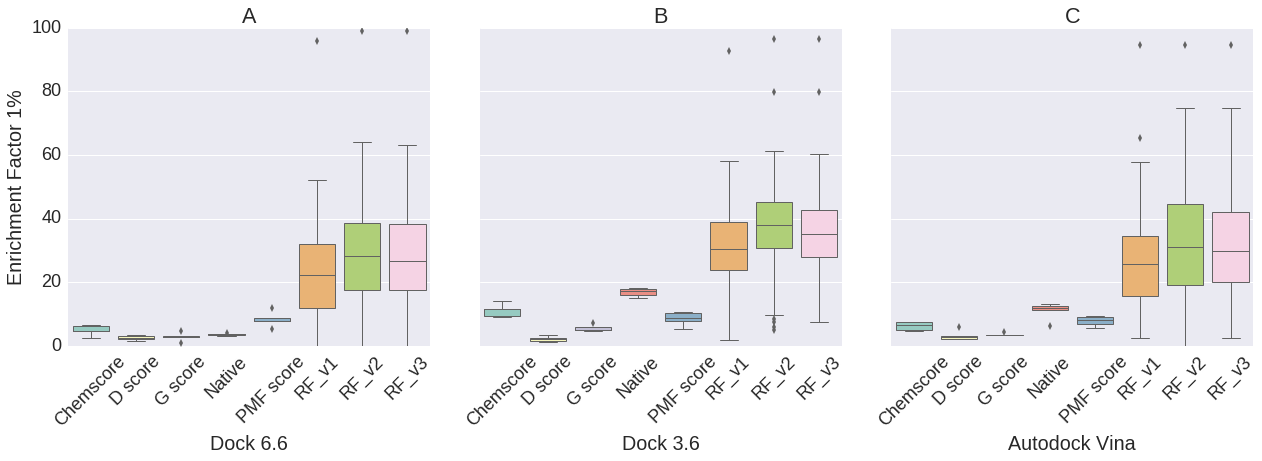

In [40]:
data2 = raport_final.copy()
data2 = data2[(data2.kind.str.startswith('Horizontal'))]
#data2['score'] = data2['kind'] + ' ' + data2['score']
#data2.loc[data2['engine'] == 'Dock 6.6'] = '\nA'

sns.set(font_scale=1.8)

#g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=12, kind="box", palette="Set3",)
g = sns.FacetGrid(col="engine", data=data2, size=6, sharey=True, sharex=False)
g.map(sns.boxplot, "score", "ef0.1", palette="Set3", linewidth=1.)

g.set_ylabels('Enrichment Factor 0.1%')
g.set_xlabels('{col_name}')

g.set_titles('{col_name}')
for ax, i in zip(g.axes[0],['A','B','C']):
    ax.set_xlabel(ax.title.get_text())
    ax.set_title(i)

g.set_xticklabels(rotation=45)
# g.savefig('dude_raport_boxplots_horizontal.svg')
g.savefig('dude_raport_boxplots_horizontal_0.1perc.png', dpi=300)

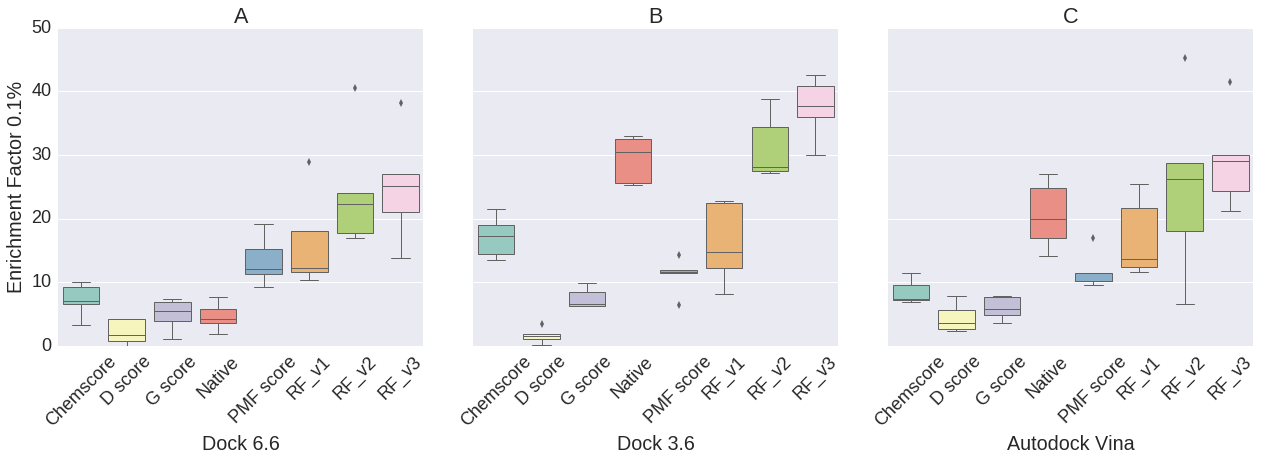

In [34]:
data2 = raport_final.copy()
#data2 = data2[(data2.engine == 'Dock 3.6') & (data2.kind.str.startswith('Vertical'))]
#data2['score'] = data2['kind'] + ' ' + data2['score']
data2 = data2[data2.kind.str.startswith('Vertical') | data2.kind.str.startswith('Horizontal') & ~data2.score.str.startswith('RF')]

sns.set(font_scale=1.8)

#g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=7, kind="box", palette="Set3",)
g = sns.FacetGrid(col="engine", data=data2, size=6, sharey=True, sharex=False, )
g.map(sns.boxplot, "score", "ef0.1", palette="Set3", linewidth=1.)

g.set_ylabels('Enrichment Factor 0.1%')
g.set_xlabels('{col_name}')

g.set_titles('{col_name}')
for ax, i in zip(g.axes[0],['A','B','C']):
    ax.set_xlabel(ax.title.get_text())
    ax.set_title(i)


g.set_xticklabels(rotation=45)
# g.fig.tight_layout()
# g.savefig('dude_raport_boxplots_vertical.svg')
g.savefig('dude_raport_boxplots_vertical_0.1perc.png', dpi=300)

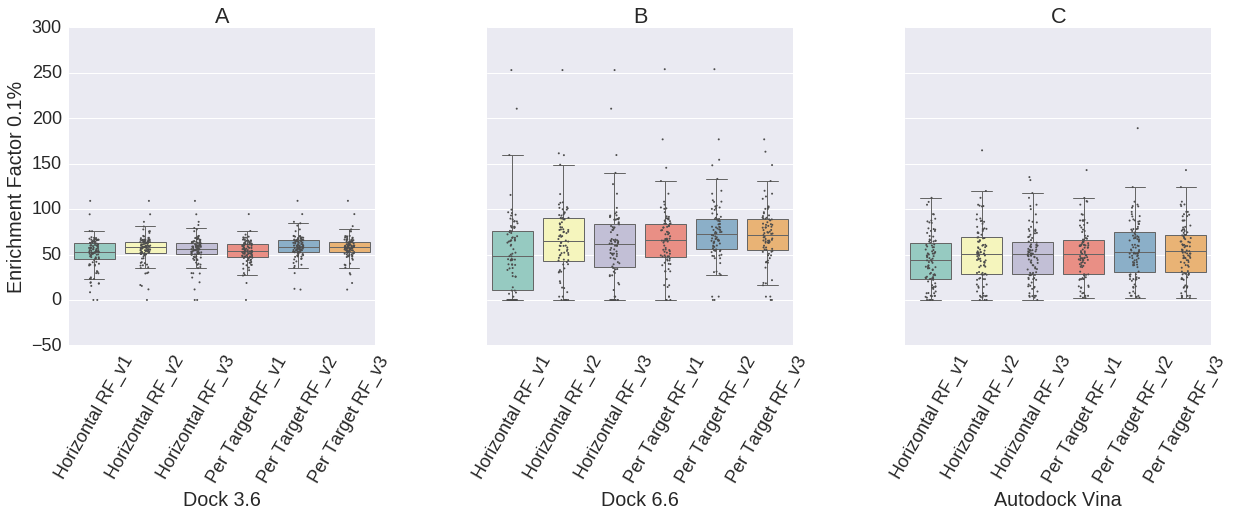

In [35]:
data2 = raport_final.copy()
data2['score'] = data2['kind'] + ' ' + data2['score']

data2 = data2[data2.kind.str.startswith('Per Target') | data2.kind.str.startswith('Horizontal') & data2.score.str.startswith('Horizontal RF')]


sns.set(font_scale=1.8)

#g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=7, kind="box", palette="Set3",)
g = sns.FacetGrid(col="engine", data=data2, size=6, sharey=True, sharex=False, aspect=1)
g.map(sns.boxplot, "score", "ef0.1", palette="Set3", fliersize=0, linewidth=1.)
g.map(sns.stripplot, "score", "ef0.1", data=data2, jitter=True, size=2, color=".3", linewidth=0)

g.set_ylabels('Enrichment Factor 0.1%')
g.set_xlabels('Docking Software')

g.set_titles('{col_name}')
for ax, i in zip(g.axes[0],['A','B','C']):
    ax.set_xlabel(ax.title.get_text())
    ax.set_title(i)

g.set_xticklabels(rotation=60)

# g.savefig('dude_raport_boxplots_all_wpoints.svg')
g.savefig('dude_raport_boxplots_all_wpoints_0.1perc.png', dpi=300)

In [36]:
data2[data2.kind.str.startswith('Per Target') & (data2['ef1'] > 60)].columns

Index([u'accuracy', u'ef0.1', u'ef1', u'ef10', u'ef1_perc', u'ef2', u'ef5',
       u'engine', u'mse', u'precision', u'recall', u'rk', u'rk_active',
       u'rk_inactive', u'roc_auc', u'roc_log_auc', u'rp', u'rp_active',
       u'rp_inactive', u'rs', u'rs_active', u'rs_inactive', u'score',
       u'n_folds', u'kind'],
      dtype='object')

In [37]:
from matplotlib.pylab import plt

In [38]:
dude_ids = ['aa2ar', 'abl1', 'ace', 'aces', 'ada', 'ada17', 'adrb1', 'adrb2', 'akt1', 'akt2', 'aldr', 'ampc', 'andr', 'aofb', 'bace1', 'braf', 'cah2', 'casp3', 'cdk2', 'comt', 'cp2c9', 'cp3a4', 'csf1r', 'cxcr4', 'def', 'dhi1', 'dpp4', 'drd3', 'dyr', 'egfr', 'esr1', 'esr2', 'fa10', 'fa7', 'fabp4', 'fak1', 'fgfr1', 'fkb1a', 'fnta', 'fpps', 'gcr', 'glcm', 'gria2', 'grik1', 'hdac2', 'hdac8', 'hivint', 'hivpr', 'hivrt', 'hmdh', 'hs90a', 'hxk4', 'igf1r', 'inha', 'ital', 'jak2', 'kif11', 'kit', 'kith', 'kpcb', 'lck', 'lkha4', 'mapk2', 'mcr', 'met', 'mk01', 'mk10', 'mk14', 'mmp13', 'mp2k1', 'nos1', 'nram', 'pa2ga', 'parp1', 'pde5a', 'pgh1', 'pgh2', 'plk1', 'pnph', 'ppara', 'ppard', 'pparg', 'prgr', 'ptn1', 'pur2', 'pygm', 'pyrd', 'reni', 'rock1', 'rxra', 'sahh', 'src', 'tgfr1', 'thb', 'thrb', 'try1', 'tryb1', 'tysy', 'urok', 'vgfr2', 'wee1', 'xiap']
dude_weights = pd.DataFrame({'dude_id':dude_id, 'actives_num': len(pd.read_csv('/home/maciek/scratch/Pobrane/dude/all/%s/actives_final.ism' % (dude_id), header=None))} for dude_id in dude_ids)

In [39]:
engine = 'Autodock Vina


SyntaxError: EOL while scanning string literal (<ipython-input-39-7bd540e011a2>, line 1)

In [ ]:
from __future__ import print_function, di

In [ ]:
out = []
for engine in ['Autodock Vina', 'Dock 3.6', 'Dock 6.6']:
    over = raport_per_target[(raport_per_target['ef1'] > 50) & (raport_per_target['engine'] == engine)]['dude_id'].unique()
    under = raport_per_target[(raport_per_target['ef1'] < 15) & (raport_per_target['engine'] == engine)]['dude_id'].unique()
    
    for dude_id in over:
        out.append({'engine': engine, 'kind': 'over', 'dude_id': dude_id})
    for dude_id in under:
        out.append({'engine': engine, 'kind': 'under', 'dude_id': dude_id})
    
    print(engine, "All")
    dude_weights.hist()
    plt.show()

    print(engine, "Over")
    dude_weights[dude_weights.dude_id.isin(over)].hist()
    plt.show()

    print(engine, "Under")
    dude_weights[dude_weights.dude_id.isin(under)].hist()
    plt.show()

In [ ]:
from itertools import combinations

In [ ]:
out2 = pd.DataFrame(out)
for kind in ['over', 'under']:
    for engine1, engine2 in combinations(['Autodock Vina', 'Dock 3.6', 'Dock 6.6'], 2):
        s1 = set(out2[(out2['engine'] == engine1) & (out2['kind'] == kind)]['dude_id'])
        s2 = set(out2[(out2['engine'] == engine2) & (out2['kind'] == kind)]['dude_id'])
        intersection = len(s1.intersection(s2))
        print(engine1,
              engine2,
              kind,
              intersection,
              len(s1), round(intersection/float(len(s1)), 2),
              len(s2), round(intersection/float(len(s2)), 2),
              sep='\t')


In [ ]:
t = out2['dude_id']

In [ ]:
import seaborn as sns

In [ ]:
sns.countplot(x="actives_num", hue="class", data=raport_per_target, palette="Greens_d");

In [ ]:
raport_per_target

In [ ]:
raport_classic_per_target

In [ ]:
cols = ['dude_id', 'ef1', 'ef0.1']
data1 = raport_per_target[(raport_per_target['score'] == 'RF_v3') & (raport_per_target['engine'] == 'Autodock Vina')]#[cols]

raport_classic_per_target = pd.read_csv('dude_classical_final.csv', index_col=0)
raport_classic_per_target['engine'].replace('dock', 'Dock 6.6', inplace=True)
raport_classic_per_target['engine'].replace('dude', 'Dock 3.6', inplace=True)
raport_classic_per_target['engine'].replace('vina', 'Autodock Vina', inplace=True)

data2 = raport_classic_per_target[(raport_classic_per_target['engine'] == 'vina') & (raport_classic_per_target['score'] == 'native')]#[cols]

data3 = pd.merge(data1, data2, on='dude_id', suffixes=('_per_target', '_classical'))

In [ ]:
data3.plot(x='roc_auc_per_target', y='roc_auc_classical',kind='scatter')
# plt.plot(x=[0,60], y=[0,60], s='-')
lim = (0, 1)
plt.plot(lim, lim, c=".2", ls="--")
plt.xlim(lim)
plt.ylim(lim)

In [ ]:
data3.plot(x='ef1_per_target', y='ef1_classical',kind='scatter')
# plt.plot(x=[0,60], y=[0,60], s='-')
lim = (0, 100)
plt.plot(lim, lim, c=".2", ls="--")
plt.xlim(lim)
plt.ylim(lim)

In [ ]:
data4 = pd.merge(raport_per_target, raport_classic_per_target, on=['dude_id', 'engine'], suffixes=('_per_target', '_classical'))
data4 = pd.merge(data4, pd.read_csv('dude_target_classes.csv'), on='dude_id', how='left')
data4['target_class'].fillna('other', inplace=True)

In [ ]:
data4.shape

In [ ]:
sns.set(style="ticks")

In [ ]:
g = sns.FacetGrid(data4[data4['score_classical'] == 'native'],
                  col='score_per_target',
                  row='engine',
                  hue='target_class',
                  sharex=False,
                  sharey=False,
                  margin_titles=True,
                  hue_kws={'marker': ['^', 'v','s', 'o', 'D']},
                  size=4)

# g.map(sns.kdeplot,
#       'ef1_per_target',
#       'ef1_classical',
#       alpha=.1,
#      )

g.map(plt.scatter,
      'ef1_per_target',
      'ef1_classical',
      s=30
     )


lim = (0, 100)
for ax in g.axes.flat:
    ax.plot(lim, lim, c=".2", ls="--")
g.set(xlim=lim, ylim=lim)
g.add_legend()
plt.show()